<a href="https://colab.research.google.com/github/JavadZandiyeh/AUT-DIP-Projects/blob/main/DIP_HW1_9831032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 0

In [ ]:
#@title Downloading the necessary data for this homework
!pip install pydicom
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37' -O 'HW1_data.zip'
!unzip HW1_data.zip

--2023-11-16 19:22:49--  https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37
Resolving drive.google.com (drive.google.com)... 173.194.213.102, 173.194.213.113, 173.194.213.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/64q5cnnis06pur1ke3dqdkv7vg5620ia/1700162550000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=ecfafa86-04a0-4632-8f24-c14c1b9dba59 [following]
--2023-11-16 19:22:49--  https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/64q5cnnis06pur1ke3dqdkv7vg5620ia/1700162550000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=ecfafa86-04a0-4632-8f24-c14c1b9dba59
Resolving doc-0k-2g-docs.googleusercontent.com (doc-0k-2g-docs.googleusercontent.com)... 74.125.196.132, 2

# The Imports

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pydicom

# Any Helper Functions

In [ ]:
# Show standard image
def image_show(image, title, vmin=0, vmax=255, cmap='gray', figsize=(6, 4)):
    plt.figure(figsize=figsize) # Set figure size
    plt.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off') # Hide axis labels
    plt.title(title, color='white', backgroundcolor='green') # Set title
    plt.show()

# Show standard image for subplots
def image_show2(ax, image, title, vmin=0, vmax=255, cmap='gray'):
    ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.axis('off') # Hide axis labels
    ax.set_title(title, color='white', backgroundcolor='green')

def hist_show(ax, image, title):
    hist, bins = np.histogram(image.flatten(), bins=64, range=[0, 255])
    ax.bar(bins[:-1], hist, width=0.5, align='edge', color='black')
    ax.set_title(title, color='white', backgroundcolor='green')

def cdf_show(ax, image, title):
    ax.plot(image)
    ax.set_title(title, color='white', backgroundcolor='green')

# Question 4: (20%)

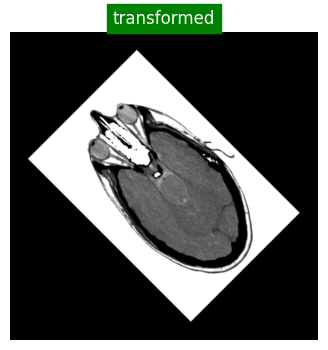

In [ ]:
#@title Q4 - Part 1 (25%)
# Read image
image = cv2.imread('transformed.png')

image_show(image, 'transformed')

Q4 - Part 1 Explanation:
<div dir=rtl>
<font size = "5">ابتدا عملیات scaling رخ داده است زیرا طول و  عرض تصویر از طول و عرض شکل کوچک‌تر است، سپس عملیات translation رخ داده است زیرا تمام تصویر در داخل کادر شکل قرار دارد وگرنه از کادر شکل بیرون میزد، در نهایت هم عملیات rotation رخ داده است. برای بازسازی تصویر به اندازه اولیه، نیاز است که این مراحل را در جهت عکس انجام دهیم</font><br />
</div>

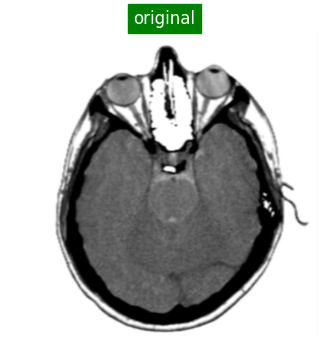

In [ ]:
#@title Q4 - Part 2 (40%)
# Find image shape
height, width, channels = image.shape

# Step1: Rotation
angle, scale = -45, 1  # Rotation angle and scale
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle=angle, scale=1)
original_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Step2: Translation
tx, ty = -130, -65  # Translation factors
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
original_image = cv2.warpAffine(original_image, translation_matrix, (width, height))

# Step3: Scaling
scale_x, scale_y = 2.02, 1.345  # Scaling factors
scaling_matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
original_image = cv2.warpAffine(original_image, scaling_matrix, (width, height))

image_show(original_image, 'original')

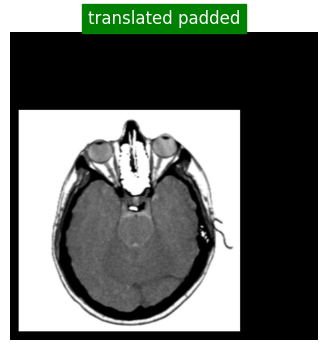

In [ ]:
#@title Q4 - Part 3 (35%)
# Add 100 pixels of padding
padding = 100
padded_image_shape = (height + 2 * padding, width + 2 * padding, channels)
padded_image = np.zeros(padded_image_shape, dtype=np.uint8)
padded_image[padding:padding + height, padding:padding + width] = original_image

# Translation of 80 pixels to the left
tx, ty = -80, 80  # Translation factors
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_padded_image = cv2.warpAffine(padded_image, translation_matrix, padded_image_shape[:2])

image_show(translated_padded_image, 'translated padded')

# Question 5: (20%)

data type: uint8, shape: (512, 512)


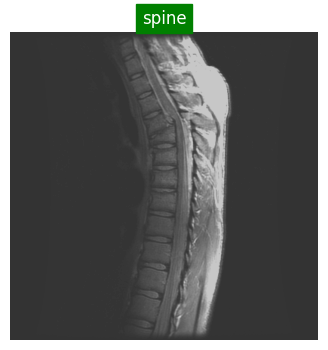

In [ ]:
#@title Q5 - Part 1 (10%)
# Read image
image = cv2.imread('spine.tif', cv2.IMREAD_GRAYSCALE)

# Print details
print(f'data type: {image.dtype}, shape: {image.shape}')

# Change data type
image = image.astype(np.float64)

image_show(image, 'spine')

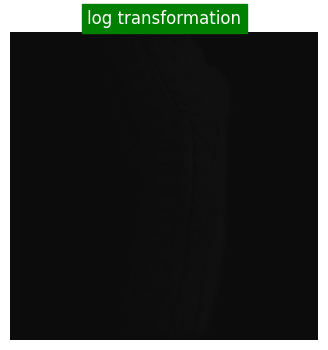

In [ ]:
#@title Q5 - Part 2 (10%)
L = 8 # number of intensity levels

def log_transform(image):
    # The constant which scales pixels
    c = (L - 1) / np.log1p(L)

    # Logarithmic transformation
    loged_image = c * np.log1p(image + 1)

    return loged_image

loged_image = log_transform(image)
image_show(loged_image, 'log transformation')

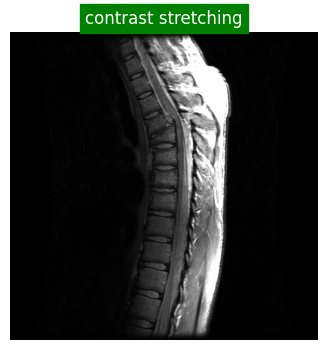

In [ ]:
#@title Q5 - Part 3 (30%)
def contrast_stretching(image):
    # Find the input image range
    min_in, max_in = np.min(image), np.max(image)

    # The linear function to stretch the image
    stretched_image = ((2**L - 1) / (max_in - min_in)) * (image - min_in)

    return stretched_image

stretched_image = contrast_stretching(image)
image_show(stretched_image, 'contrast stretching')

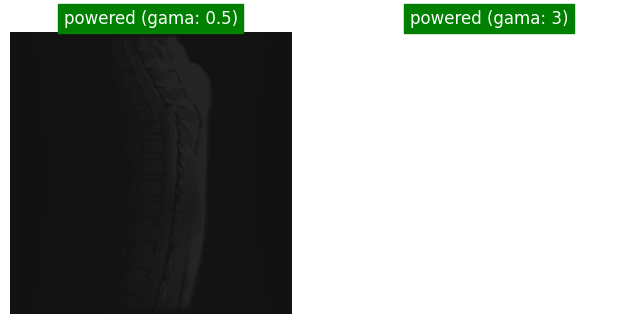

In [ ]:
#@title Q5 - Part 4 (15%)
def power_law_transform(image, gama):
    # The constant which scales pixels
    c = (L - 1)**(1-gama)

    # Power law transformation function
    powered_image = c * np.power(image, gama)

    return powered_image

powered_image1 = power_law_transform(image, 0.5)
powered_image2 = power_law_transform(image, 3)

# Show images with gama 3 and 0.5
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
image_show2(ax[0], powered_image1, 'powered (gama: 0.5)')
image_show2(ax[1], powered_image2, 'powered (gama: 3)')
fig.show()

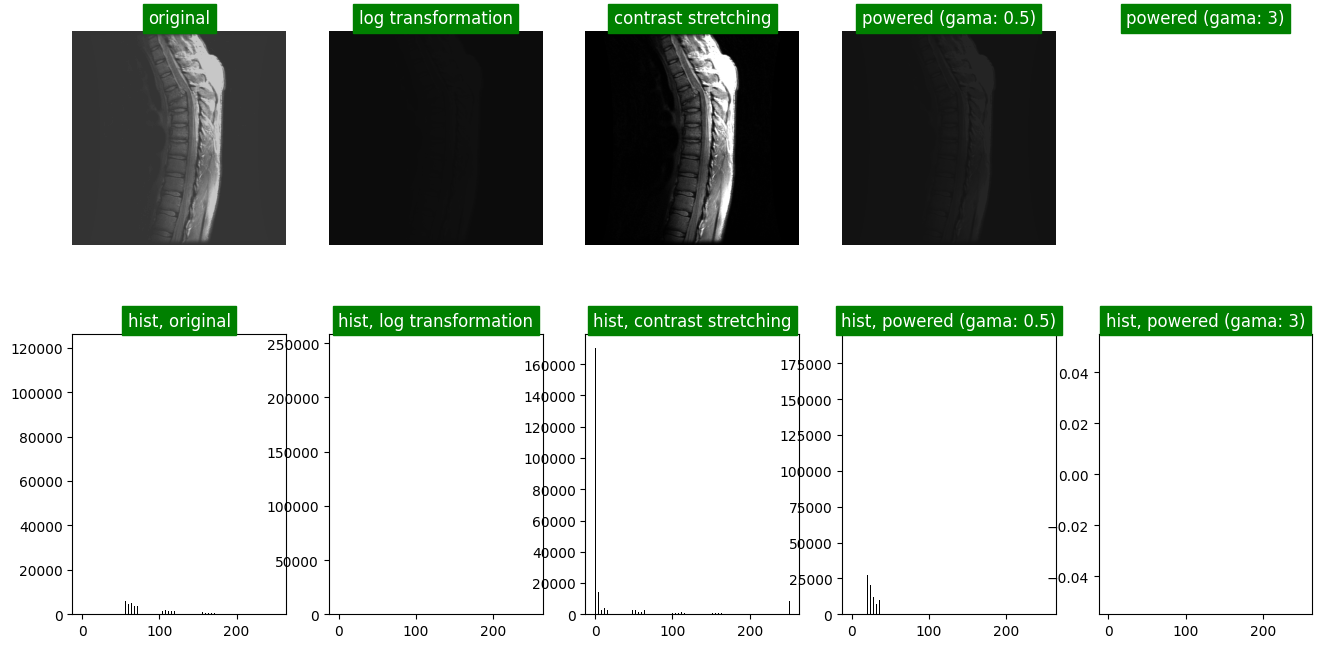

In [ ]:
#@title Q5 - Part 5 (15%)
fig, ax = plt.subplots(2, 5, figsize=(16, 8))

# Show images
image_show2(ax[0][0], image, 'original')
image_show2(ax[0][1], loged_image, 'log transformation')
image_show2(ax[0][2], stretched_image, 'contrast stretching')
image_show2(ax[0][3], powered_image1, 'powered (gama: 0.5)')
image_show2(ax[0][4], powered_image2, 'powered (gama: 3)')

# Show histograms for each image
hist_show(ax[1][0], image, 'hist, original')
hist_show(ax[1][1], loged_image, 'hist, log transformation')
hist_show(ax[1][2], stretched_image, 'hist, contrast stretching')
hist_show(ax[1][3], powered_image1, 'hist, powered (gama: 0.5)')
hist_show(ax[1][4], powered_image2, 'hist, powered (gama: 3)')

fig.show()

Q5 - Part 6 Explanation (20%):
<div dir=rtl>
<font size = "5">در انتقال لگاریتمی، مقادیر با شدت کم، بیشتر تقویت میشوند و مقادیر با شدت زیاد کم‌تر تقویت میشوند. به همین دلیل است که تصویر تیره تر شده است، زیرا مقادیر کوچک‌تر که قسمت تیره تصویر هستند بیشتر بولد شده اند. در contrast stretching مقادیر صرفا در بازه ۰ تا ۲۵۵ اسکیل شده اند و همینطور که دیده میشود، شدت‌های بیشتری درگیر شده اند و تصویر حاوی طیف بیشتری از شدت‌ها میباشد که تصویر را واضح‌تر نشان داده است. در حالتی که از تبدیل power law استفاده شده است، اگر مقدار گاما بزرگتر از یک باشد مقادیر شدت کوچکتر، اهمیت داده میشوند و مشاهده میشود که تصویر تیره شده است. اما هرچه گاما کوچک‌تر از یک باشد، مقادیر با شدت بزرگتر، بیشتر اهمیت داده میشوند و مشاهده میشود که قسمت‌های روشن تصویر قابل مشاهده‌تر از حالت گاما 3 است.</font><br />
</div>

# Question 6: (35%)

data type: uint8, shape: (706, 320)


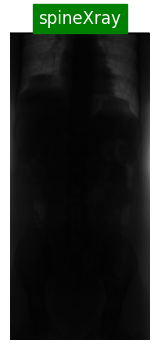

In [ ]:
#@title Q6 - Part 1 (5%)
# Read image
image = cv2.imread('spineXray.tif', cv2.IMREAD_GRAYSCALE)

# Print details
print(f'data type: {image.dtype}, shape: {image.shape}')

image_show(image, 'spineXray')

In [ ]:
#@title Q6 - Part 2 (5%)
equalized_image = cv2.equalizeHist(image)

In [ ]:
#@title Q6 - Part 3 (25%)
def equalizeHist(image):
    # Compute histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF to the range [0, 255]
    cdf_normalized = cdf * 255 / cdf[-1]

    # Use linear interpolation to get the equalized values
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)

    # Reshape the equalized values to the original image shape
    equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)

    return equalized_image

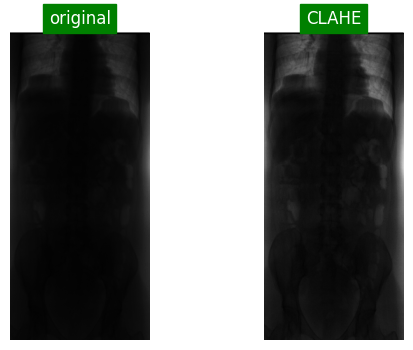

In [ ]:
#@title Q6 - Part 4 (20%)
# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
clahe_image = clahe.apply(image)

# Display the original and CLAHE-enhanced images
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
image_show2(ax[0], image, 'original')
image_show2(ax[1], clahe_image, 'CLAHE')
plt.show()

Q6 - Part 5 Explanation (10%):
<div dir=rtl>
<font size = "5">پارامتر clipLimit محدودیت کنتراست را کنترل می کند و پارامتر tileGridSize اندازه شبکه را برای یکسان سازی هیستوگرام تعیین می کند.</font><br />
</div>

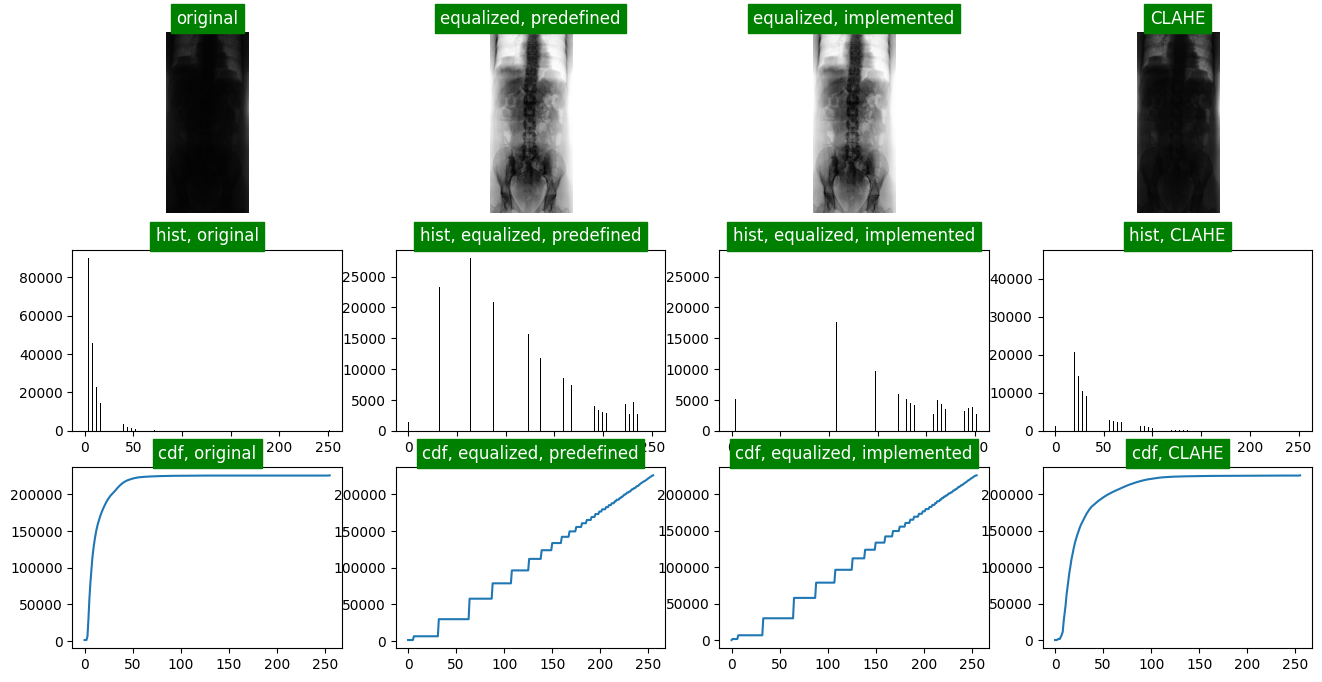

In [ ]:
#@title Q6 - Part 5 (10%)
fig, ax = plt.subplots(3, 4, figsize=(16, 8))

# Show images
image_show2(ax[0][0], image, 'original')
image_show2(ax[0][1], equalized_image, 'equalized, predefined')
image_show2(ax[0][2], equalizeHist(image), 'equalized, implemented')
image_show2(ax[0][3], clahe_image, 'CLAHE')

# Show histograms for each image
hist_show(ax[1][0], image, 'hist, original')
hist_show(ax[1][1], equalized_image, 'hist, equalized, predefined')
hist_show(ax[1][2], equalizeHist(image), 'hist, equalized, implemented')
hist_show(ax[1][3], clahe_image, 'hist, CLAHE')

# Show cumulative distribution function (CDF)
def image_cdf(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    return cdf

cdf_show(ax[2][0], image_cdf(image), 'cdf, original')
cdf_show(ax[2][1], image_cdf(equalized_image), 'cdf, equalized, predefined')
cdf_show(ax[2][2], image_cdf(equalizeHist(image)), 'cdf, equalized, implemented')
cdf_show(ax[2][3], image_cdf(clahe_image), 'cdf, CLAHE')

fig.show()

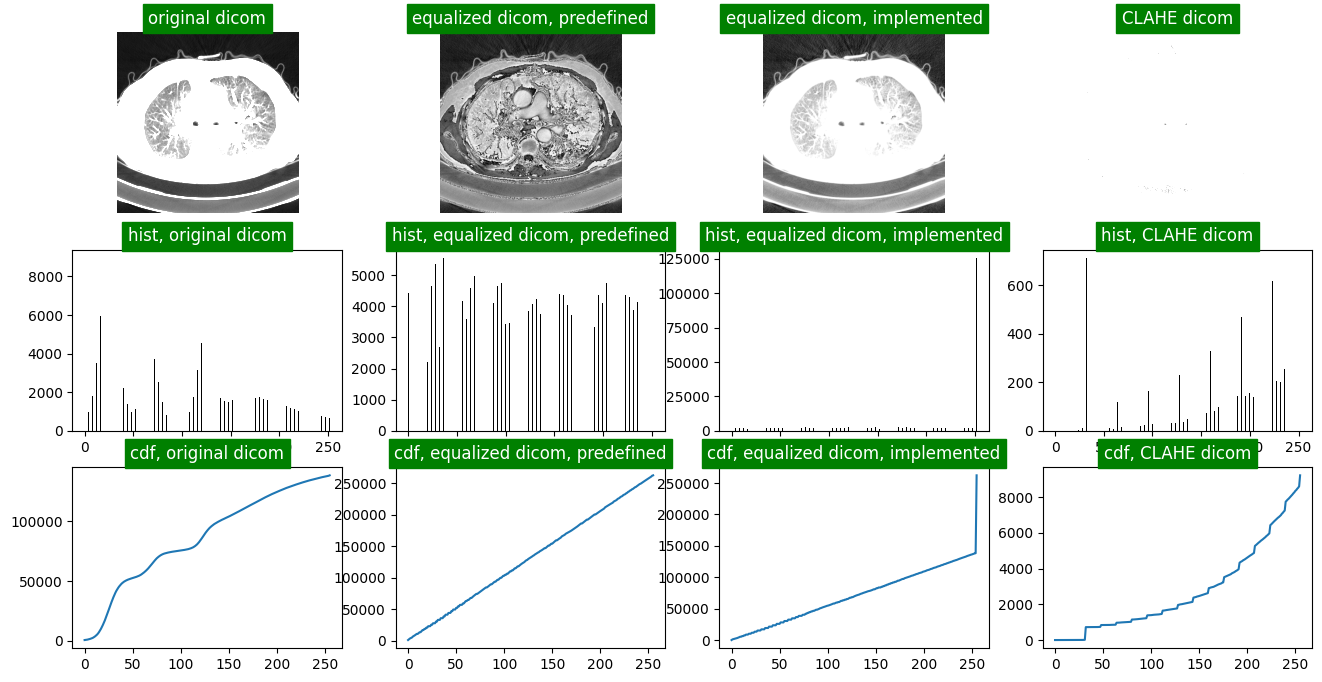

In [ ]:
#@title Q6 - Part 7 (25%)
# Get dicom-image data
dicom_data = pydicom.dcmread('file.dcm')

# Get image from dicom-data
dicom_image = dicom_data.pixel_array

# equalizeHist on dicom-image
dicom_equalized_image = cv2.equalizeHist(dicom_image.astype(np.uint8))

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
dicom_clahe_image = clahe.apply(dicom_image)

# Visualize images
fig, ax = plt.subplots(3, 4, figsize=(16, 8))

# Show images
image_show2(ax[0][0], dicom_image, 'original dicom')
image_show2(ax[0][1], dicom_equalized_image, 'equalized dicom, predefined')
image_show2(ax[0][2], equalizeHist(dicom_image), 'equalized dicom, implemented')
image_show2(ax[0][3], dicom_clahe_image, 'CLAHE dicom')

# Show histograms for each image
hist_show(ax[1][0], dicom_image, 'hist, original dicom')
hist_show(ax[1][1], dicom_equalized_image, 'hist, equalized dicom, predefined')
hist_show(ax[1][2], equalizeHist(dicom_image), 'hist, equalized dicom, implemented')
hist_show(ax[1][3], dicom_clahe_image, 'hist, CLAHE dicom')

# Show cumulative distribution function (CDF)
def image_cdf(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    return cdf

cdf_show(ax[2][0], image_cdf(dicom_image), 'cdf, original dicom')
cdf_show(ax[2][1], image_cdf(dicom_equalized_image), 'cdf, equalized dicom, predefined')
cdf_show(ax[2][2], image_cdf(equalizeHist(dicom_image)), 'cdf, equalized dicom, implemented')
cdf_show(ax[2][3], image_cdf(dicom_clahe_image), 'cdf, CLAHE dicom')

fig.show()